In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imshow(title="image",image=None,size=10):
    w,h = image.shape[0],image.shape[1]
    aspect_ratio=w/h
    plt.figure(figsize=(size*aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

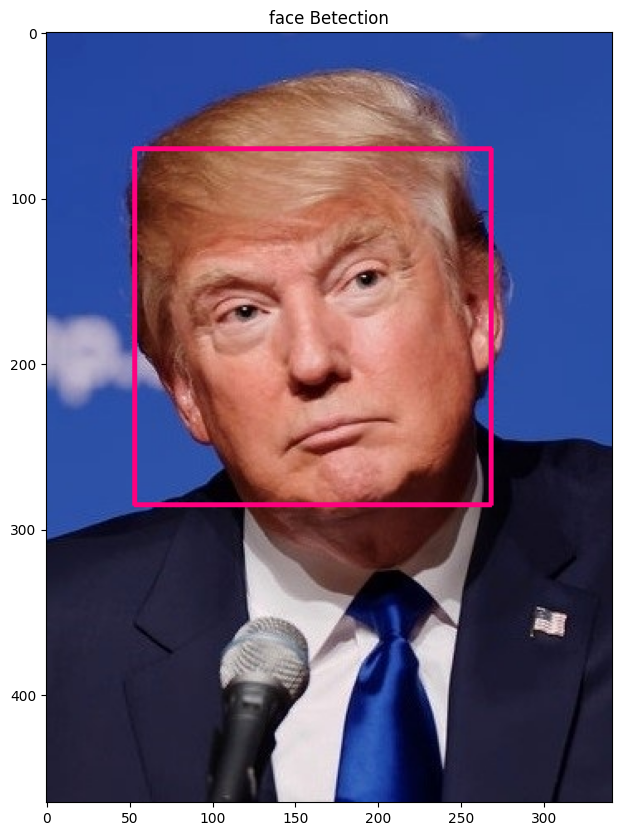

In [4]:
face_classifier=cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
image=cv2.imread('/content/Trump.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
faces=face_classifier.detectMultiScale(gray,scaleFactor=1.3,minNeighbors=5)
if faces.size == ():
    print("No faces found")
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(127,0,255),2)

    imshow('face Betection',image)



#Simple eye & face detection using Haarcascade classifier

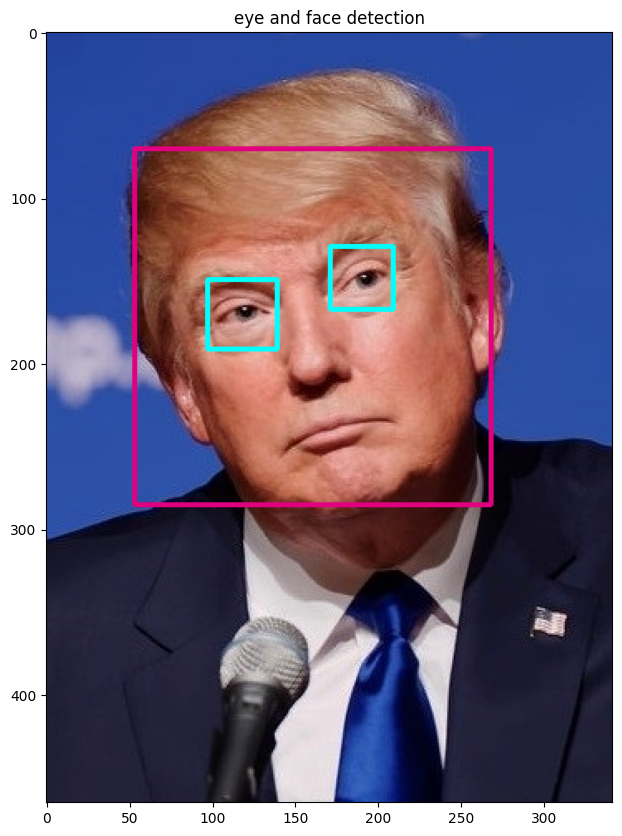

In [8]:
import numpy as np
import cv2

face_classifier=cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
eye_classifier=cv2.CascadeClassifier("/content/haarcascade_eye.xml")
img=cv2.imread('/content/Trump.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces=face_classifier.detectMultiScale(gray,1.3,5)

if faces.size==():
  print('no faces found')
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,225),2)
  roi_gray=gray[y:y+h,x:x+w]
  roi_color=img[y:y+h,x:x+w]
  eyes=eye_classifier.detectMultiScale(roi_gray,1.2,3)
  for(ex,ey,ew,wh)in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+wh),(255,255,0),2)
imshow('eye and face detection',img)


In [9]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


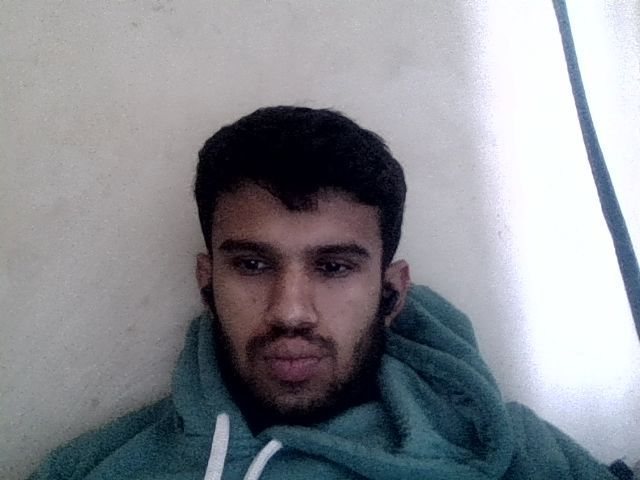

In [11]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

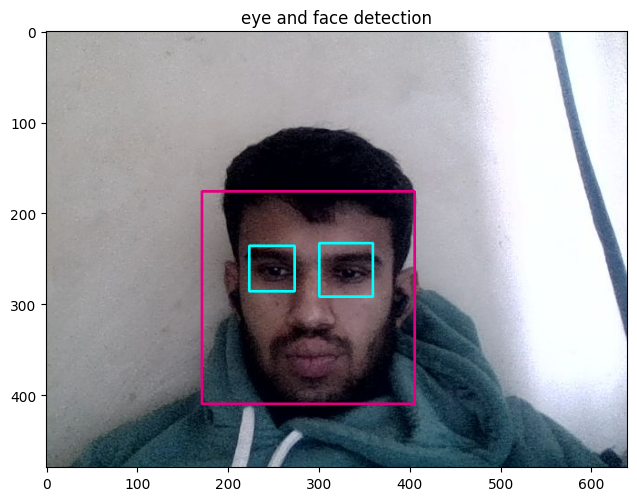

In [13]:
import numpy as np
import cv2

face_classifier=cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
eye_classifier=cv2.CascadeClassifier("/content/haarcascade_eye.xml")
img=cv2.imread('/content/photo.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces=face_classifier.detectMultiScale(gray,1.3,5)

if faces.size==():
  print('no faces found')
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,225),2)
  roi_gray=gray[y:y+h,x:x+w]
  roi_color=img[y:y+h,x:x+w]
  eyes=eye_classifier.detectMultiScale(roi_gray,1.1,2)
  for(ex,ey,ew,wh)in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+wh),(255,255,0),2)
imshow('eye and face detection',img)


In [15]:
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('/content/haarcascade_eye.xml')

def face_detector(img, size=0.5):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces.size == ():
        return img

    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)

        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)

    roi_color = cv2.flip(roi_color,1)
    return roi_color

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame from camera.")
        break
    cv2.imshow('Our Face Extractor', face_detector(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()

Error: Could not read frame from camera.
